# Load Package

In [30]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from numpy.random import seed
from sklearn import cluster
import seaborn as sns

In [5]:
import os
import re
import sys
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Reading the dataset 

In [6]:
dataset=pd.read_csv('D:\Ismail\download ismail/rituximab.csv')
dataset.iloc[:20]

,FSC.H,SSC.H,FL1.H,FL2.H,FL3.H,FL1.A,FL1.W,Time,Gate
0,309,376,264,198,313,0,0,2,1
1,83,55,139,51,146,0,0,2,1
2,184,198,232,83,124,0,0,2,1
3,169,75,696,22,193,121,26,2,2
4,212,98,166,0,221,0,0,2,1
5,164,143,108,160,117,0,0,2,1
6,525,628,581,250,50,39,0,2,1
7,80,41,84,0,190,0,0,2,1
8,369,306,405,106,199,2,0,2,1
9,152,129,113,83,54,0,0,2,1


# Dataset description 

Scattering Parameters The first two parameters (FSCH/SSCH) are measurements of the scattering of the laser beam in the laser beams direction and orthogonal to the laser beam's direction. The amount of scattering in the forward direction (FSCH) is dependent on the cell size.The scattering in the orthogonal direction is also dependent on the size of the cell but is additionally dependent on the cell's internal structure and it's membrane. These parameters can thus be simplified as measures of a cell's size (FSCH) and a cell's internal complexity (SSCH) however in reality this is not taking into account the full complexity of the problem.

Flourescence Parameters FL1H/FL2H/FL3H/FL1A/FL1W are flourescence parameters. When a fluorescent dye is conjugated to a monoclonal antibody, it can be used to identify a particular cell type based on the individual properties of the cell.In a mixed population of cells, different fluorochromes can be used to distinguish separate subpopulations and this is why multiple flourescence parameters are recorded. As the fluorescing cell passes through the laser beam, it creates a peak or pulse of photon emission over time. These are detected and converted to a voltage pulse, known as an event. The total pulse height and area is measured by the flow cytometer. The measured voltage pulse area will correlate directly to the intensity of fluorescence for that event. Each event is given a channel number depending on its measured intensity; the more intense the fluorescence, the higher the channel number the event is assigned.

Time The time variable is not used in the analysis below but it can be used to detect physiological changes in cell populations when a given sample is analysed at different times. For example, it could detect the change in the proportion of healthy cells to malignant cells in time after a drug treatment has been applied.

Gate This is the label given to each cell by the researcher according to a specific gating protocol. The gating protocol used is an unknown.


In [7]:
len(dataset)

1545

In [8]:
dataset.describe()

,FSC.H,SSC.H,FL1.H,FL2.H,FL3.H,FL1.A,FL1.W,Time,Gate
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.00000,1545.000000,1545.000000,1545.000000
mean,287.082201,251.826537,349.163754,126.399353,258.344984,73.45890,17.598706,294.038835,0.968932
std,178.193127,186.647075,234.347550,90.839352,192.264975,195.15186,56.391323,177.554519,0.795270
min,59.000000,11.000000,0.000000,0.000000,1.000000,0.00000,0.000000,2.000000,-1.000000
25%,178.000000,130.000000,197.000000,55.000000,150.000000,0.00000,0.000000,140.000000,1.000000
50%,249.000000,199.000000,244.000000,116.000000,203.000000,0.00000,0.000000,285.000000,1.000000
75%,331.000000,307.000000,445.000000,185.000000,315.000000,8.00000,0.000000,451.000000,1.000000
max,1023.000000,1023.000000,974.000000,705.000000,1023.000000,1023.00000,444.000000,598.000000,2.000000


In [9]:
dataset.isnull().sum()

FSC.H    0
SSC.H    0
FL1.H    0
FL2.H    0
FL3.H    0
FL1.A    0
FL1.W    0
Time     0
Gate     0
dtype: int64

In [10]:
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544
FSC.H,309,83,184,169,212,164,525,80,369,152,...,330,207,130,68,464,340,124,678,722,277
SSC.H,376,55,198,75,98,143,628,41,306,129,...,582,227,117,169,424,460,149,327,443,1023
FL1.H,264,139,232,696,166,108,581,84,405,113,...,311,207,212,15,328,249,445,274,871,398
FL2.H,198,51,83,22,0,160,250,0,106,83,...,267,162,112,0,216,23,129,196,218,355
FL3.H,313,146,124,193,221,117,50,190,199,54,...,143,66,210,9,358,363,83,259,714,120
FL1.A,0,0,0,121,0,0,39,0,2,0,...,0,0,0,0,0,0,9,0,675,4
FL1.W,0,0,0,26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,279,0
Time,2,2,2,2,2,2,2,2,2,2,...,598,598,598,598,598,598,598,598,598,598
Gate,1,1,1,2,1,1,1,1,1,1,...,1,1,1,-1,1,1,1,-1,2,-1


# # Cleaning Dataset

In [11]:
dataset1=dataset.drop('Time',axis=1)
dataset1=dataset1[dataset1['Gate']!=-1]
dataset1.loc[:, "Gate"] = dataset1.loc[:, "Gate"].map({1: 0, 2: 1})
print("The dataset contains ",dataset1.isnull().sum().sum()," null values")
print('The first 20 elements of the cleaned dataset are shown below')
dataset1.head(20)

The dataset contains  0  null values
The first 20 elements of the cleaned dataset are shown below


,FSC.H,SSC.H,FL1.H,FL2.H,FL3.H,FL1.A,FL1.W,Gate
0,309,376,264,198,313,0,0,0
1,83,55,139,51,146,0,0,0
2,184,198,232,83,124,0,0,0
3,169,75,696,22,193,121,26,1
4,212,98,166,0,221,0,0,0
5,164,143,108,160,117,0,0,0
6,525,628,581,250,50,39,0,0
7,80,41,84,0,190,0,0,0
8,369,306,405,106,199,2,0,0
9,152,129,113,83,54,0,0,0


# Split Dataset

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset1, test_size=0.2, random_state=42)
train_labels=train_set.copy()['Gate']
test_labels=test_set.copy()['Gate']
test_no_labels=test_set.copy().drop('Gate',axis=1)
print('The train set has ',train_set.shape[0],' data points')
print('The test set has ',test_set.shape[0],' data points')

The train set has  1099  data points
The test set has  275  data points


# Exploratory Data Analysis

The data is now analysed with both graphical and descriptive statistics to look for potential problems , patterns and correlations with the target variable (Gate).

C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matpl

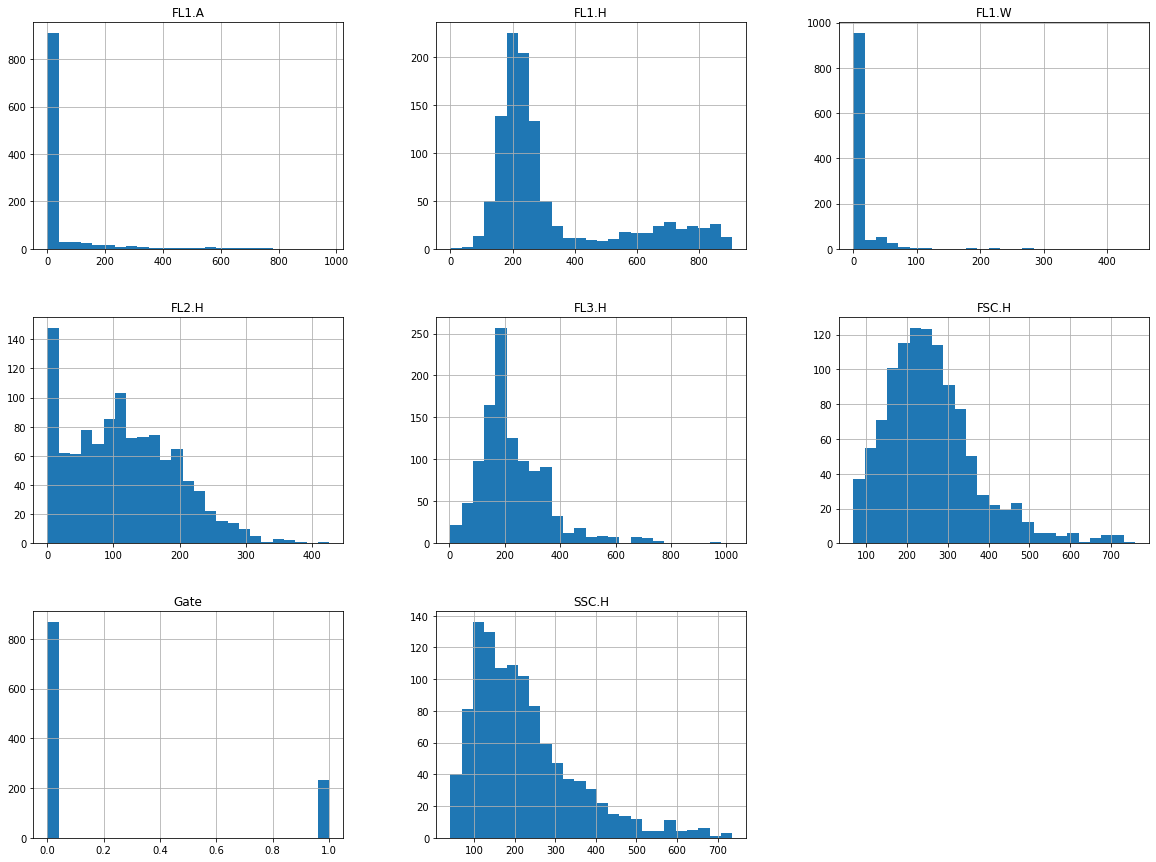

In [13]:
#Variable Histograms
train_set.hist(bins=25, figsize=(20,15))

plt.show()

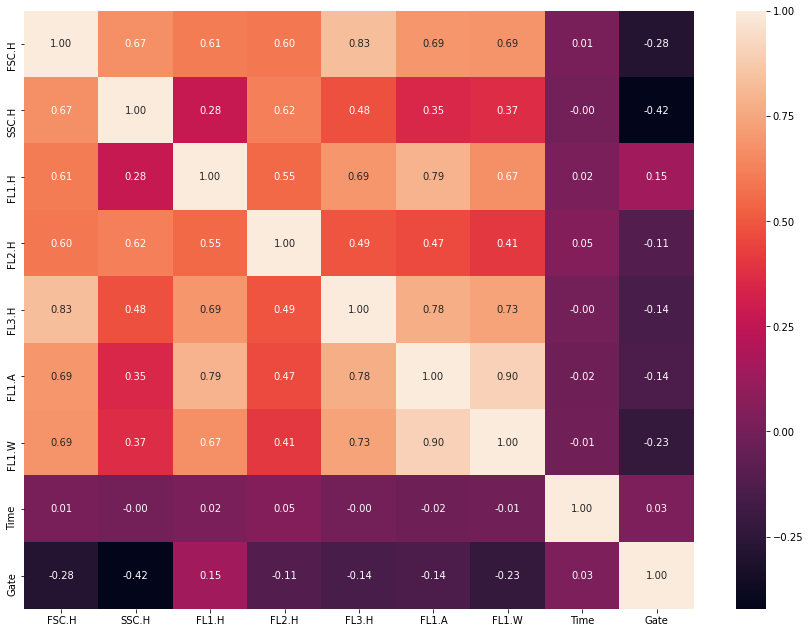

In [14]:
#
%matplotlib inline
plt.figure(figsize=(15,11))
sns.heatmap(dataset.corr(),annot=True,fmt='.2f')
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\no

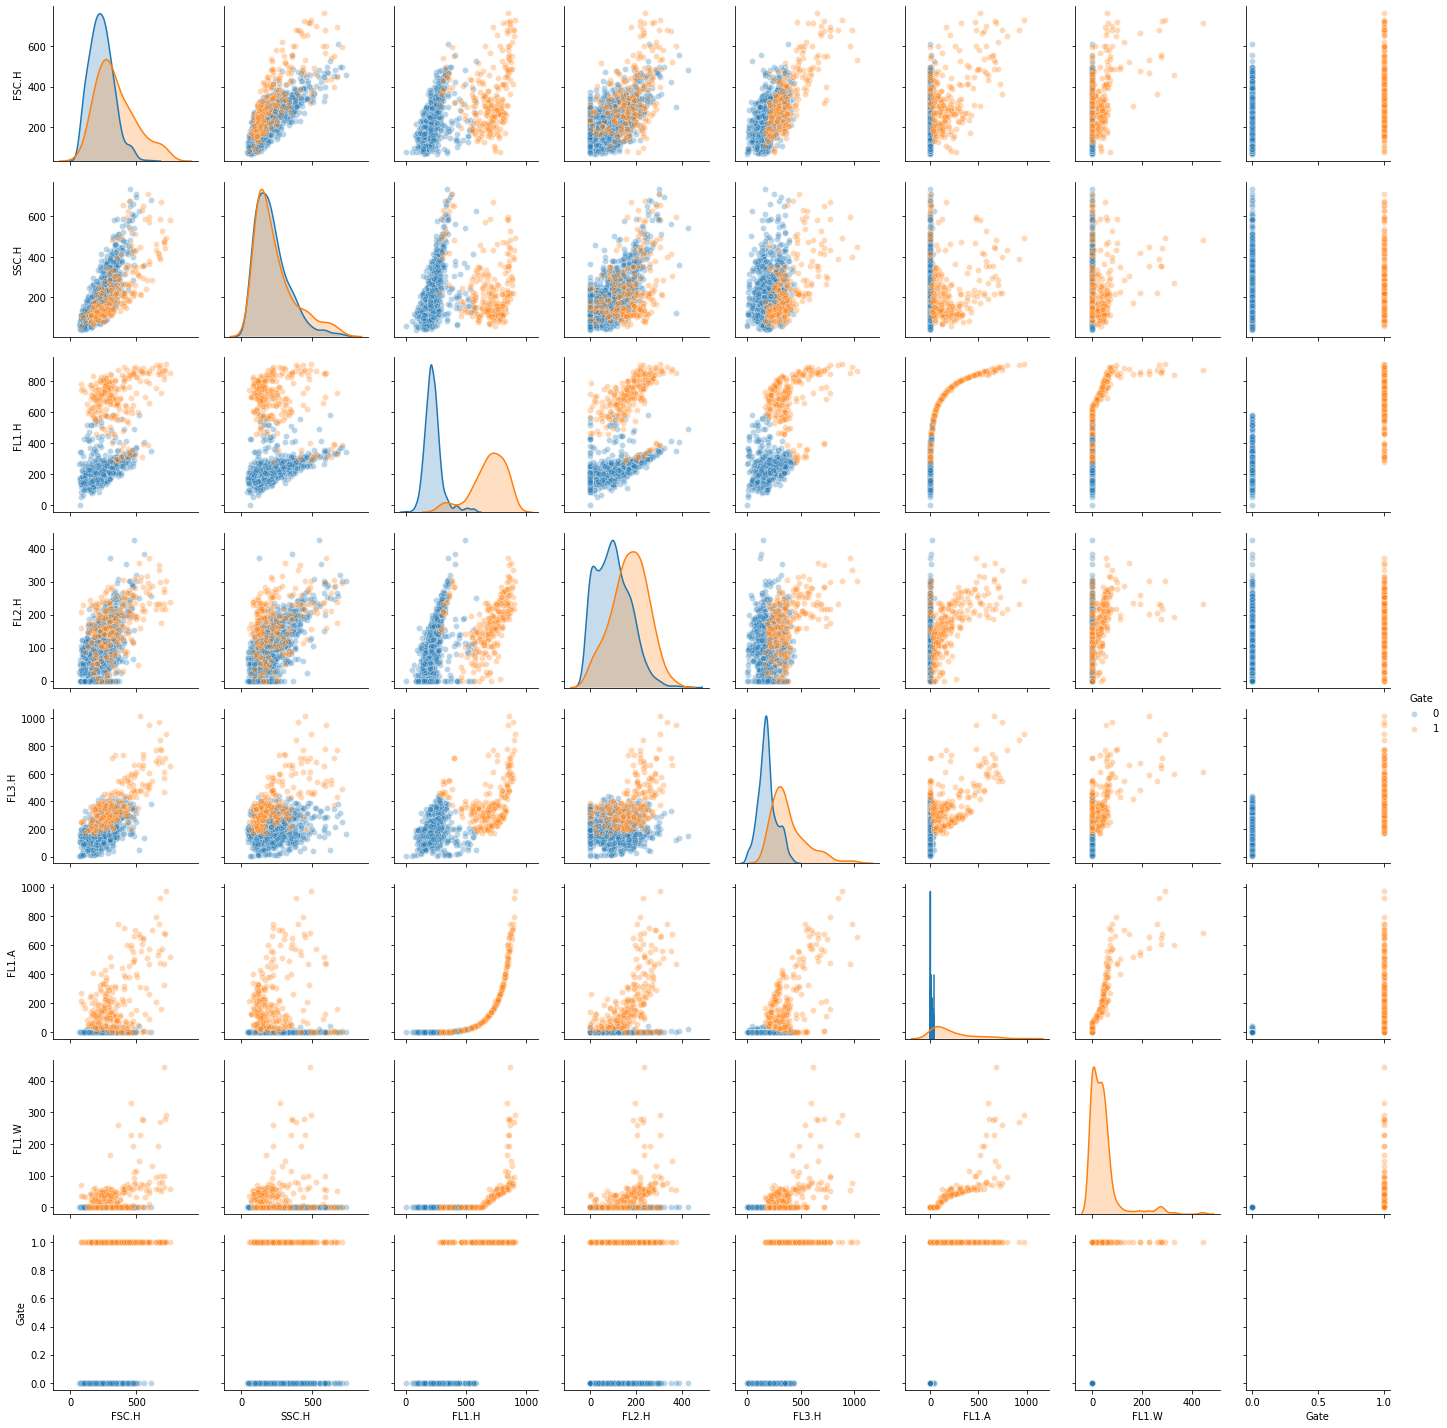

In [15]:
#Scatter Matrix
ax=sns.pairplot(train_set,hue='Gate',plot_kws={'alpha': 0.3})
ax.fig.set_size_inches(20, 20);

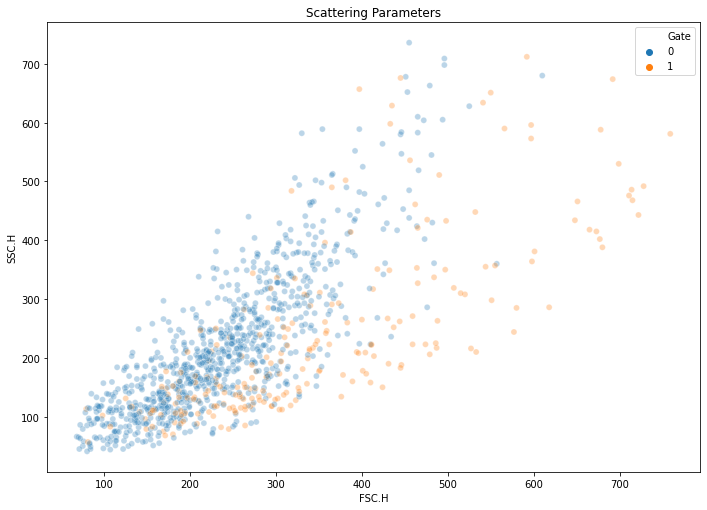

In [16]:
#Scattering parameters
fig,ax =plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.scatterplot(x="FSC.H", y="SSC.H", hue="Gate",  data=train_set,alpha=0.3)
ax.set_title("Scattering Parameters");

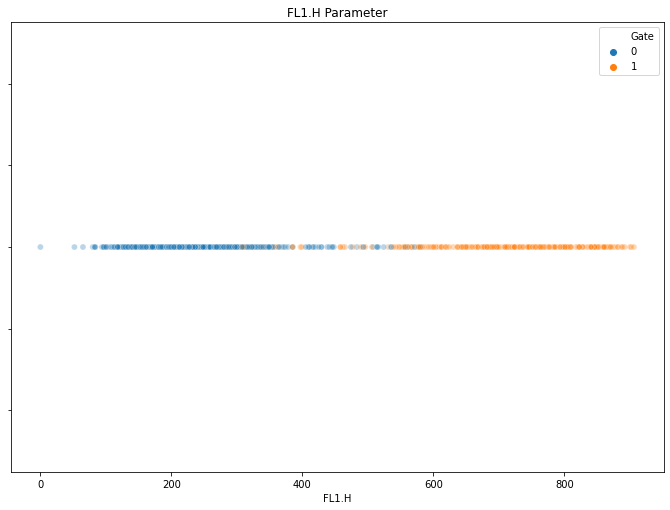

In [17]:
#FL1H Parameter
fig,ax =plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.scatterplot(x="FL1.H",y=1, hue="Gate",  data=train_set,alpha=0.3)
ax.set_title("FL1.H Parameter");

ax.set_yticklabels([]);

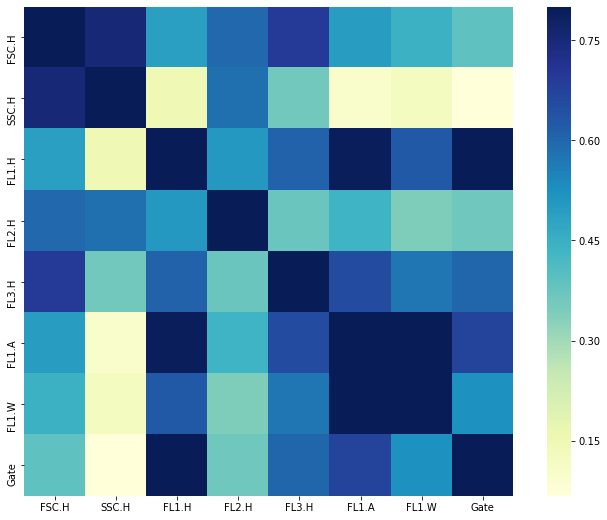

In [18]:
#correlation matrix
corrmat = train_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='YlGnBu');

# Unsupervised Learning Models

In [19]:
#K Means Clustering

from sklearn.cluster import KMeans
train_no_labels=train_set.drop('Gate',axis=1)
Kmean = KMeans(n_clusters=2)
Kmean.fit(train_no_labels)
kmlabels=pd.DataFrame(Kmean.labels_)
tkl=train_set.copy()
kmlabels = kmlabels.set_index(train_set.index)
tkl['km']=kmlabels
# Running k means on separate occasions may yield different values for the labels, in this case 0 or 1
# The following is a probably bad way of setting the output of the k means labelling to be the one that I want so the graph labels are correct


def g(row):
    if (row['km'] == 0):
        val = 1
    elif (row['km']==1):
        val = 0
        
        return val

if((tkl['km'].iloc[0]!=0) and (tkl['km'].iloc[1]!=0)):
    tkl['km']=tkl.apply(g,axis=1)

def f(row):
    if (row['Gate'] == row['km'] and row['Gate']==0):
        val = 'Gate 0'
    elif (row['Gate'] == row['km'] and row['Gate']==1):
        val = 'Gate 1'
    elif row['Gate'] != row['km']:
        val = 'Misclassified'
    
    return val

tkl['colorlabel'] = tkl.apply(f, axis=1)

tkl.head()
print('The Scatter plot of the K Means clustering is shown below\n The green points correspond to points that were assigned to the wrong class')

The Scatter plot of the K Means clustering is shown below
 The green points correspond to points that were assigned to the wrong class


In [ ]:
pip install pandas==0.25.3

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\no

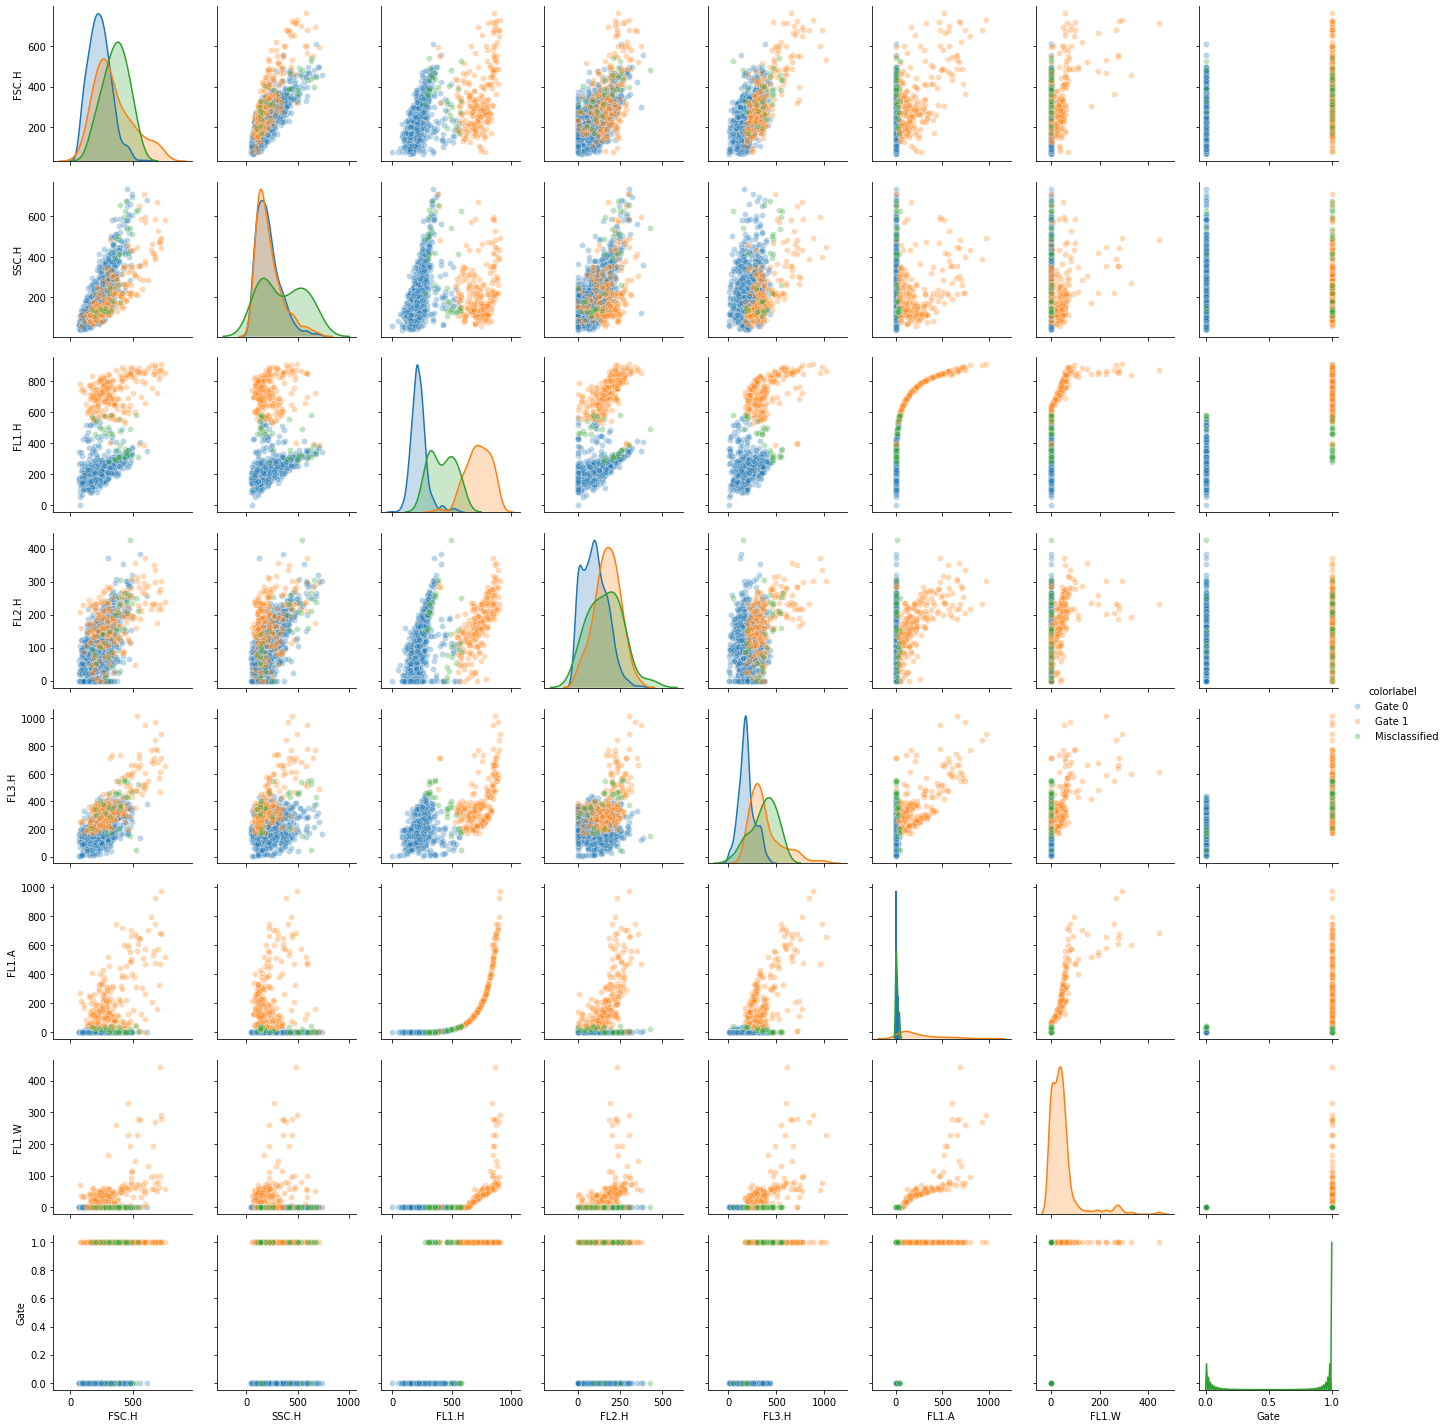

In [20]:
ax=sns.pairplot(tkl,hue='colorlabel',plot_kws={'alpha': 0.3},vars=['FSC.H', 'SSC.H', 'FL1.H', 'FL2.H', 'FL3.H', 'FL1.A', 'FL1.W','Gate'])
ax.fig.set_size_inches(20, 20);

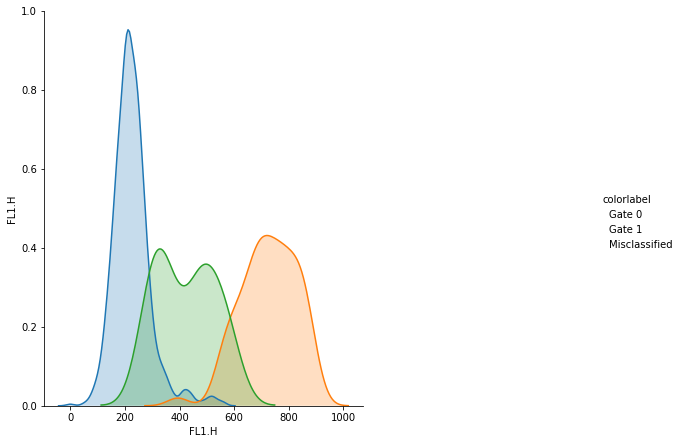

In [21]:
ax=sns.pairplot(data=tkl,hue='colorlabel',vars=['FL1.H'])
ax.fig.set_size_inches(12, 8);

In [22]:
from sklearn.metrics import adjusted_rand_score
adjrand=adjusted_rand_score(tkl['Gate'],tkl['km'])
rand=(tkl['colorlabel'].value_counts()[0]+tkl['colorlabel'].value_counts()[1])/(tkl['colorlabel'].value_counts().sum())
print('The Rand Index is ',round(rand,4))
print('The Adjusted Rand Index is ',round(adjrand,4))

The Rand Index is  0.9736
The Adjusted Rand Index is  0.8823


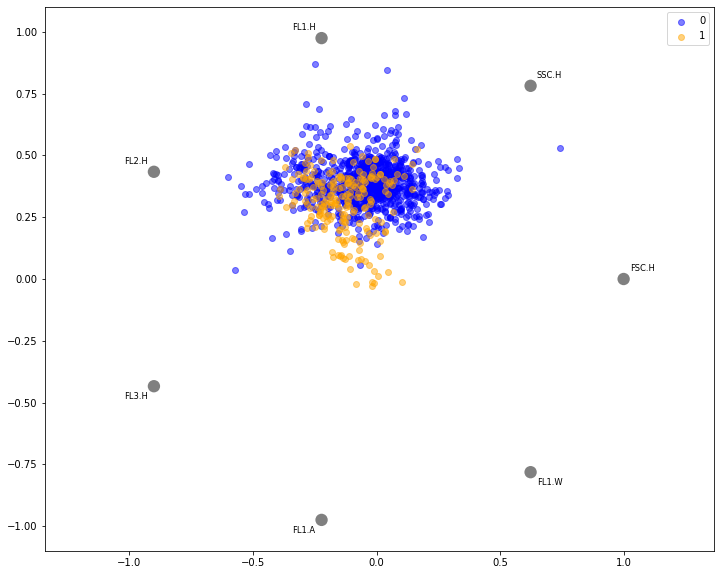

In [23]:
from pandas.plotting import radviz
fig = plt.figure( )
fig.set_size_inches(12,10)

tr=tkl.drop(['Gate','colorlabel'],axis=1)
tr.head()
rad_viz = pd.plotting.radviz(tr, 'km',color=['blue','orange'],alpha=0.5)

In [24]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
s=AgglomerativeClustering(n_clusters=2,linkage='single')
s.fit(train_no_labels)
rs=adjusted_rand_score(tkl['Gate'],s.labels_)
print('Adjusted Rand Index for Hierarchical Clustering with single linkage is ',round(rs,4))

a=AgglomerativeClustering(n_clusters=2,linkage='average')
a.fit(train_no_labels)
ra=adjusted_rand_score(tkl['Gate'],a.labels_)
print('Adjusted Rand Index for Hierarchical Clustering with average linkage is ',round(ra,4))

c=AgglomerativeClustering(n_clusters=2,linkage='complete')
c.fit(train_no_labels)
rc=adjusted_rand_score(tkl['Gate'],c.labels_)
print('Adjusted Rand Index for Hierarchical Clustering with complete linkage is ',round(rc,4))

w=AgglomerativeClustering(n_clusters=2,linkage='ward')
w.fit(train_no_labels)
rw=adjusted_rand_score(tkl['Gate'],w.labels_)
print('Adjusted Rand Index for Hierarchical Clustering with ward linkage is ',round(rw,4))

Adjusted Rand Index for Hierarchical Clustering with single linkage is  0.005
Adjusted Rand Index for Hierarchical Clustering with average linkage is  0.2922
Adjusted Rand Index for Hierarchical Clustering with complete linkage is  0.1784
Adjusted Rand Index for Hierarchical Clustering with ward linkage is  0.9067


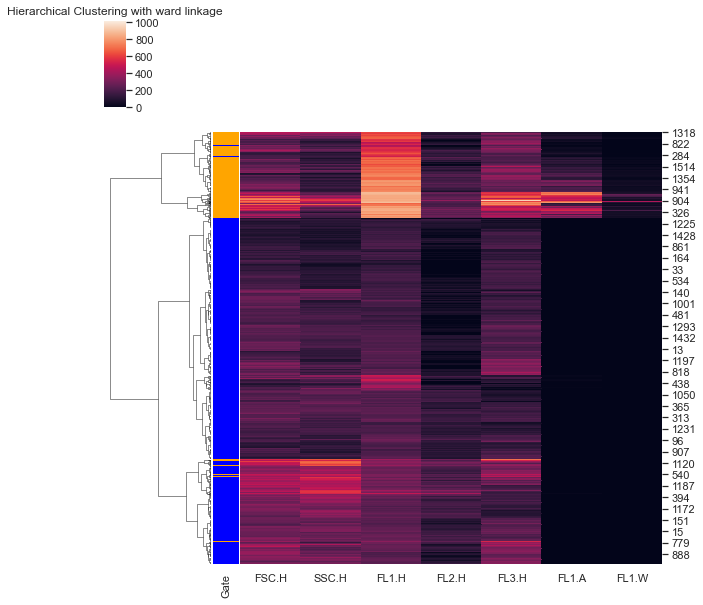

In [26]:
label=train_set.copy().pop('Gate')
lut = dict(zip(label.unique(), ['blue','orange']))
row_colors = label.map(lut)

sns.set(rc={'figure.figsize':(12,8)})
g = sns.clustermap(train_no_labels, col_cluster=False,method='ward',row_colors=row_colors)
plt.title('Hierarchical Clustering with ward linkage');

# Supervised Classification Methods

In [28]:
#K Nearest Neighbors
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid,cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(train_no_labels,train_labels);

In [29]:
c=grid_search.cv_results_
print ('10 K Nearest Neighbors classifiers were trained on 5 stratified subsets of the data and evaluted on the part that was not used for training\n')
print('Evaluating K Nearest Neighbor Classifier predictions...\n')
print ('The mean accuracy score for the 10 classifiers on the 5 folds are shown below\n')

for mean_score,params in zip(c['mean_test_score'],c['params']):
    print (round(mean_score,5),params)
print ('The optimal model has mean score',round(c['mean_test_score'][4],4))

10 K Nearest Neighbors classifiers were trained on 5 stratified subsets of the data and evaluted on the part that was not used for training

Evaluating K Nearest Neighbor Classifier predictions...

The mean accuracy score for the 10 classifiers on the 5 folds are shown below

0.98817 {'n_neighbors': 1}
0.98362 {'n_neighbors': 2}
0.9909 {'n_neighbors': 3}
0.98999 {'n_neighbors': 4}
0.99181 {'n_neighbors': 5}
0.9909 {'n_neighbors': 6}
0.98908 {'n_neighbors': 7}
0.98726 {'n_neighbors': 8}
0.98817 {'n_neighbors': 9}
0.98817 {'n_neighbors': 10}
The optimal model has mean score 0.9918


In [31]:
#Logictic Regression
log_clf=SGDClassifier(loss='log',random_state=42)
cv=cross_validate(log_clf,train_no_labels,train_labels,scoring='accuracy',cv=StratifiedKFold(5))
s=0

print('Evaluating Logistic Regression Model predictions...\n')
for i,x in enumerate(cv['test_score']):
    s+=x
    print('The accuracy of the logistic classifier on fold',i+1,'is',round(x,5))

print('\nThe mean of the accuracy of the model on the 5 folds is',round(s/5,4))


Evaluating Logistic Regression Model predictions...

The accuracy of the logistic classifier on fold 1 is 0.96833
The accuracy of the logistic classifier on fold 2 is 0.96818
The accuracy of the logistic classifier on fold 3 is 0.95455
The accuracy of the logistic classifier on fold 4 is 0.94064
The accuracy of the logistic classifier on fold 5 is 0.96804

The mean of the accuracy of the model on the 5 folds is 0.9599


In [32]:
#Decision Tree Classifier
param_grid={'max_depth':[2,4,6,8,10]}
tree=DecisionTreeClassifier()
grid_search=GridSearchCV(tree,param_grid,cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(train_no_labels,train_labels);

In [33]:
c=grid_search.cv_results_
print ('5 Decision Tree Classifiers were trained on 5 stratified subsets of the data and evaluted on the part that was not used for training\n')
print('Evaluating Decison Tree Classifier predictions...\n')
print ('The mean accuracy score for the 5 classifiers on the 5 folds are shown below\n')

for mean_score,params in zip(c['mean_test_score'],c['params']):
    print (round(mean_score,5),params)
print('\nThe optimal depth of the decision tree with the settings chosen is',grid_search.best_params_['max_depth'])

5 Decision Tree Classifiers were trained on 5 stratified subsets of the data and evaluted on the part that was not used for training

Evaluating Decison Tree Classifier predictions...

The mean accuracy score for the 5 classifiers on the 5 folds are shown below

0.98089 {'max_depth': 2}
0.98999 {'max_depth': 4}
0.98544 {'max_depth': 6}
0.98726 {'max_depth': 8}
0.98999 {'max_depth': 10}

The optimal depth of the decision tree with the settings chosen is 4


In [36]:
y_test = np.asarray(test_labels)



knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_no_labels,train_labels)


print('Evaluating models on test set...\n')


    

knn.fit(train_no_labels,train_labels)
kpred_labels=knn.predict(test_no_labels)
kmis= np.where(y_test != knn.predict(test_no_labels))


print('Accuracy score for KNeighbors Classifier on test set is',round(100*accuracy_score(test_labels,kpred_labels),4),'%')


log_clf.fit(train_no_labels,train_labels)
lpred_labels=log_clf.predict(test_no_labels)
lmis= np.where(y_test != log_clf.predict(test_no_labels))

print('Accuracy score for Logistic Regression model on test set is',round(100*accuracy_score(test_labels,lpred_labels),4),'%')






Evaluating models on test set...

Accuracy score for KNeighbors Classifier on test set is 98.5455 %
Accuracy score for Logistic Regression model on test set is 95.2727 %
